In [2]:
!pip install nltk
!pip install spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 1.8 MB/s eta 0:00:00a 0:00:01
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.15.2-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.3-py3-none-any.whl.metadata (65 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached cloudpathlib-0.21.0-p

In [10]:
nltk.download("brown")

[nltk_data] Downloading package brown to
[nltk_data]     /Users/christophlaute/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [1]:
import nltk
import spacy
from nltk.corpus import brown
from nltk import TreebankWordTokenizer
from nltk import TreebankWordDetokenizer
import re
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import numpy as np

In [2]:
brown_words = brown.words()
romance=brown.words(categories="romance")
scifi =brown.words(categories="science_fiction")


In [3]:
detokenizer = TreebankWordDetokenizer()
#converting words to raw text to tokenise myself
brown_text = detokenizer.detokenize(brown_words)
romance_text =  detokenizer.detokenize(romance)
scifi_text = detokenizer.detokenize(scifi)



In [4]:
#now i can tokenise the text with my own definition = removing punctuations etc


def transform(tokens):
    """transformer of tokens that removes non alphabetic tokens and also keeps contractions and normalizes tokens"""
    tokens = [word.lower() for word in tokens if word.isalpha()] # removes puntuation etc. that is unrelevant for word counts and normalizes to lower
    #rejoins contractions
    contractions = ["n't", "'s", "'re", "'ve", "'ll", "'d", "'m", "'t"]
    for index, token in enumerate(tokens):
        if tokens[index] in contractions:
            tokens[index]= tokens[index-1]+tokens[index]
            tokens[index-1] ="delete"
    tokens = [token for token in tokens if token!="delete"]
    return tokens

tokeniser = TreebankWordTokenizer()

#tokenising the different texts
brown_tokenised =tokeniser.tokenize(brown_text)
romance_tokenised = tokeniser.tokenize(romance_text)
scifi_tokenised = tokeniser.tokenize(scifi_text)

#transforming it to fit our word definition and make it comparable
brown_transformed = transform(brown_tokenised)
romance_transform = transform(romance_tokenised)
scifi_transform = transform(scifi_tokenised)

In [5]:
#checking that contrations were joined
contractions = ["n't", "'s", "'re", "'ve", "'ll", "'d", "'m", "'t"]
not_joined = [element for element in brown_transformed if element in contractions]
print(len(not_joined))

0


In [7]:
#frequencies of unique tokens
def frequency_counter(tokens):
    """count frequencies and returns frequency dict"""
    freq_dict ={token:0 for token in set(tokens)}
    for token in tokens:
        freq_dict[token]+=1
    return freq_dict

frequencies_brown = frequency_counter(brown_transformed)
frequencies_romance = frequency_counter(romance_transform)
frequencies_scifi = frequency_counter(scifi_transform)
print(f"frequencies_brown = {frequencies_brown}")
print(f"frequencies_romance = {frequencies_romance}")
print(f"frequencies_scifi = {frequencies_scifi}")

frequencies_brown = {'misdemeanor': 2, 'cagayan': 1, 'submitted': 21, 'lehner': 1, 'daisies': 3, 'flashes': 9, 'imperishable': 1, 'knackwurst': 1, 'levers': 6, 'pierce': 6, 'better': 414, 'vault': 2, 'anthropology': 7, 'valmet': 1, 'australian': 9, 'compilations': 2, 'picks': 4, 'directness': 4, 'consolidated': 6, 'viability': 3, 'elena': 3, 'mathematics': 20, 'communese': 5, 'monetary': 9, 'mix': 13, 'swaying': 3, 'mudwagon': 1, 'celia': 1, 'laxness': 2, 'pallet': 1, 'swingy': 1, 'politician': 13, 'enterprising': 5, 'arid': 2, 'amplifying': 1, 'rationally': 3, 'galindez': 1, 'unlocked': 12, 'examined': 28, 'suavity': 1, 'trustingly': 1, 'provost': 2, 'chancellorsville': 1, 'bucolic': 1, 'specialists': 19, 'pynte': 1, 'apocryphal': 1, 'idal': 1, 'uxbridge': 1, 'infra': 1, 'unshakeable': 1, 'pow': 1, 'cones': 2, 'derelicts': 1, 'elsewhere': 45, 'midwife': 1, 'tearle': 1, 'putting': 54, 'indian': 57, 'collingwood': 2, 'longwood': 1, 'bordeaux': 2, 'back': 966, 'is': 10208, 'imitated': 4,

In [8]:
def sorted_tokens(frequencies):
    """sorts the tokens in descending order based on their frequencies"""
    words = list(frequencies.keys())
    values = list(frequencies.values())
    values.sort(reverse=True)
    final_words = []
    for value in values:
        for word in words:
            if frequencies[word] ==value:
                final_words.append(word)
                words.remove(word)
        values.remove(value)
    return final_words

sorted_brown = sorted_tokens(frequencies_brown)
sorted_romance = sorted_tokens(frequencies_romance)
sorted_scifi = sorted_tokens(frequencies_scifi)


In [9]:
#top ten per genre
print("Top 10 scifi:",sorted_scifi[:10])
print("Top 10 romance:",sorted_romance[:10])
print("Top 10 brown:",sorted_brown[:10])

Top 10 scifi: ['the', 'to', 'a', 'he', 'in', 'it', 'that', 'you', 'for', 'on']
Top 10 romance: ['the', 'to', 'of', 'he', 'in', 'it', 'her', 'you', 'with', 'at']
Top 10 brown: ['the', 'and', 'a', 'that', 'was', 'for', 'with', 'his', 'be', 'at']


In [63]:
#number of tokens
number_tokens_brown = len(brown_tokenised)
number_tokens_romance = len(romance_tokenised)
number_tokens_scifi = len(scifi_tokenised)

print(f"Number of tokens in brown: {number_tokens_brown}")
print(f"Number of tokens in romance: {number_tokens_romance}")
print(f"Number of tokens in scifi: {number_tokens_scifi}")

Number of tokens in brown: 1172648
Number of tokens in romance: 71374
Number of tokens in scifi: 14628


In [64]:
#number of words
number_words_brown = len(brown_transformed)
number_words_romance = len(romance_transform)
number_words_scifi = len(scifi_transform)

print(f"Number of words in brown: {number_words_brown}")
print(f"Number of words in romance: {number_words_romance}")
print(f"Number of words in scifi: {number_words_scifi}")

Number of words in brown: 992191
Number of words in romance: 58208
Number of words in scifi: 11918


In [70]:
#number of types
number_tyoes_brown = len(set(brown_tokenised))
number_types_romance = len(set(romance_tokenised))
number_types_scifi = len(set(scifi_tokenised))
print(f"Number of types in brown: {number_tyoes_brown}")
print(f"Number of types in romance: {number_types_romance}")
print(f"Number of types in scifi: {number_types_scifi}")

Number of types in brown: 53760
Number of types in romance: 8223
Number of types in scifi: 3182


In [80]:
#average words per sentence
def av_word_sent(sentences):
    """calculates average words per sentence"""
    sentence_counter =0
    for sentence in sentences:
        sentence = detokenizer.detokenize(sentence)
        sentence_tokenised = tokeniser.tokenize(sentence)
        sentence_transformed = transform(sentence_tokenised)
        sentence_counter+= len(sentence_transformed)
    average_words = sentence_counter/len(sentences)
    return average_words
av_brown = av_word_sent(brown.sents())
av_romance = av_word_sent(brown.sents(categories="romance"))
av_scifi = av_word_sent(brown.sents(categories="science_fiction"))
print(f"Average words per sentence in brown: {av_brown}")
print(f"Average words per sentence in romance: {av_romance}")
print(f"Average words per sentence in scifi: {av_scifi}")



Average words per sentence in brown: 17.30380188350192
Average words per sentence in romance: 13.136538027533287
Average words per sentence in scifi: 12.571729957805907


In [81]:
#average word length
def av_word_length(transformed_tokens):
    """calculates average word length"""
    word_length =0
    for word in transformed_tokens:
        word_length+= len(word)
    average_length = word_length/len(transformed_tokens)
    return average_length
av_length_brown = av_word_length(brown_transformed)
av_length_romance = av_word_length(romance_transform)
av_length_scifi = av_word_length(scifi_transform)
print(f"Average word length in brown: {av_length_brown}")
print(f"Average word length in romance: {av_length_romance}")
print(f"Average word length in scifi: {av_length_scifi}")

   

Average word length in brown: 4.679634263967321
Average word length in romance: 4.206672622319956
Average word length in scifi: 4.4591374391676455


In [115]:
# lemmas
def lemma_counter(tokens):
    """returns number of lemmas"""
    lemmas = []
    lemmatizer = WordNetLemmatizer()
    for token in tokens:
        lemma = lemmatizer.lemmatize(token)
        if lemma not in lemmas:
            lemmas.append(lemma)
    nr_lemmas = len(lemmas)
           
    return nr_lemmas

print("Lemmas in brown:", lemma_counter(brown_transformed))
print("Lemmas in romance:", lemma_counter(romance_transform))
print("Lemmas in scifi:", lemma_counter(scifi_transform))




Lemmas in brown: 35323
Lemmas in romance: 6768
Lemmas in scifi: 2702


In [ ]:
# pos tagging
pos_tags_brown = nltk.pos_tag(brown_words)
pos_tags_romance = nltk.pos_tag(romance)
pos_tags_scifi = nltk.pos_tag(scifi)

def top_pos(pos_tags):
    """returns top 10 pos tags per corpus"""
    # counts the number od times a tag occurs
    pos_counter = {}
    for tag in pos_tags:
        if tag[1] in pos_counter:
            pos_counter[tag[1]] += 1
        else:
            pos_counter[tag[1]] = 1
    #sorts the tag frequencies and returns a list of the sorted unique tags
    tags = list(pos_counter.keys())
    values = list(pos_counter.values())
    values.sort(reverse=True)
    final_pos = []
    for i,value in enumerate(values):
        for tag in tags:
            if pos_counter[tag] ==value:
                final_pos.append(tag)
                tags.remove(tag)
        values.remove(value)
    return pos_counter,final_pos

pos_brown,top_brown = top_pos(pos_tags_brown)
pos_romance,top_romance = top_pos(pos_tags_romance)
pos_scifi,top_scifi = top_pos(pos_tags_scifi)
print("Top 10 pos tags in brown:",top_brown[:10])
print("Top 10 pos tags in romance:",top_romance[:10])
print("Top 10 pos tags in scifi:",top_scifi[:10])
        

Top 10 pos tags in brown: ['NN', 'DT', 'NNP', '.', 'VBD', 'PRP', 'VB', 'TO', 'VBG', 'VBP']
Top 10 pos tags in romance: ['NN', 'DT', 'VBD', ',', 'NNP', 'CC', 'NNS', 'TO', 'VBN', '``']
Top 10 pos tags in scifi: ['NN', 'DT', 'VBD', 'PRP', 'NNP', 'NNS', 'CC', 'TO', "''", 'VBG']


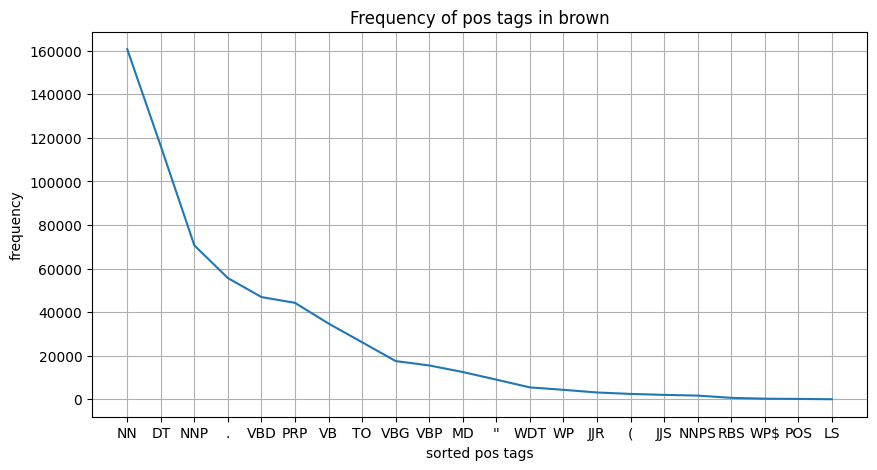

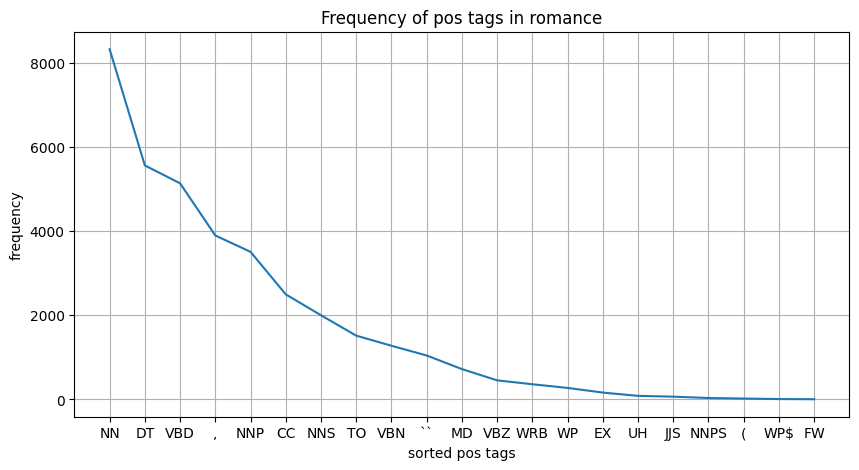

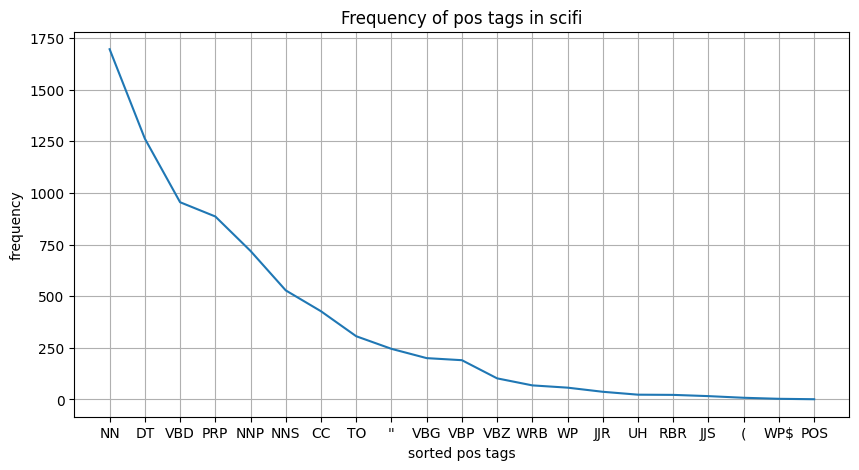

In [ ]:
def frequency_plots(sorted_keys,pos,name):
    """plots the frequencies of the pos tags"""
    sort_keys = sorted_keys
    values = [pos[key] for key in sort_keys]
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(sort_keys, values)
    ax.set(xlabel='sorted pos tags', ylabel='frequency',
           title=f"Frequency of pos tags in {name}")
    ax.grid()
    plt.show()
frequency_plots(top_brown,pos_brown,"brown")
frequency_plots(top_romance,pos_romance,"romance")
frequency_plots(top_scifi,pos_scifi,"scifi")

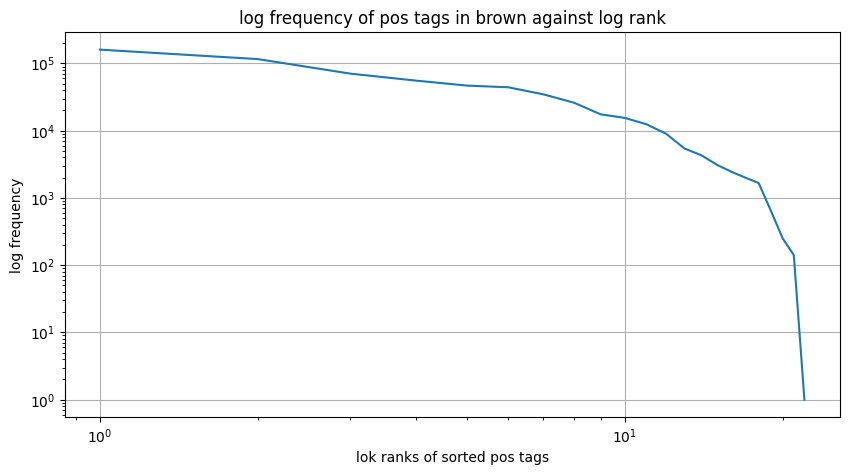

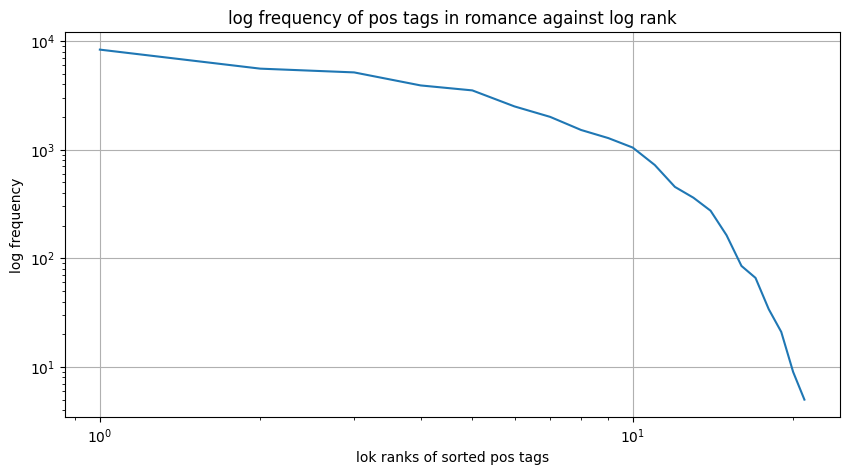

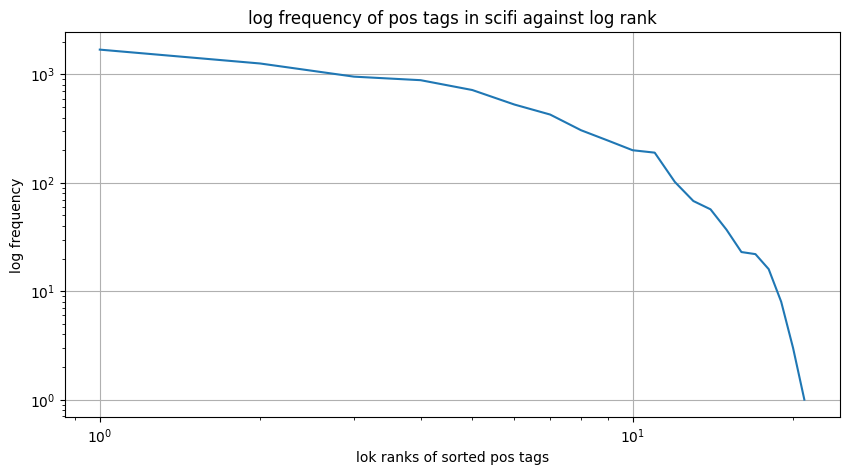

In [117]:
def log_log_frequency_plots(sorted_keys,pos,name):
    """plots the log-log frequencies of the pos tags"""
    sort_keys = sorted_keys
    values = [pos[key] for key in sort_keys]
    ranks =np.arange(1,len(sort_keys)+1)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ranks, values)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set(xlabel='lok ranks of sorted pos tags', ylabel='log frequency',
           title=f"log frequency of pos tags in {name} against log rank")
    ax.grid()
    plt.show()
log_log_frequency_plots(top_brown,pos_brown,"brown")
log_log_frequency_plots(top_romance,pos_romance,"romance")
log_log_frequency_plots(top_scifi,pos_scifi,"scifi")